In [1]:
# Importando os dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = pd.read_csv(
    "./src/banking_notes.csv",
    header=0,
    names=["variance", "skewness", "curtosis", "entropy", "classification"],
)
classification = dataset["classification"]

In [2]:
# Gráficos de Correlação
def show_graphs():
    sns.heatmap(dataset.corr(), annot=True, cmap="rocket_r", cbar=True, linewidths=0.2)
    plt.show()
    sns.pairplot(dataset, hue="classification")
    plt.show()
    print(dataset["classification"].value_counts())

    sns.countplot(x=classification, data=dataset)
    sns.displot(dataset["variance"], height=3, aspect=1.5)
    plt.xlabel("variance")
    sns.displot(dataset["curtosis"], height=3, aspect=1.5)
    plt.xlabel("curtosis")
    sns.displot(dataset["skewness"], height=3, aspect=1.5)
    plt.xlabel("skewness")
    sns.displot(dataset["entropy"], height=3, aspect=1.5)
    plt.xlabel("entropy")
    plt.show()

In [3]:
# Treinando os dados
attributes = dataset[dataset.columns[0:4]]  # Indexação dos Atributos
# Treinando com 30% dos dados
# 1ª Seq x_train = treino ~ x_test = testes
# 2ª Seq y_train = treino ~ y_test = testes
x_train, x_test, y_train, y_test = train_test_split(
    attributes, classification, test_size=0.30, random_state=28
)

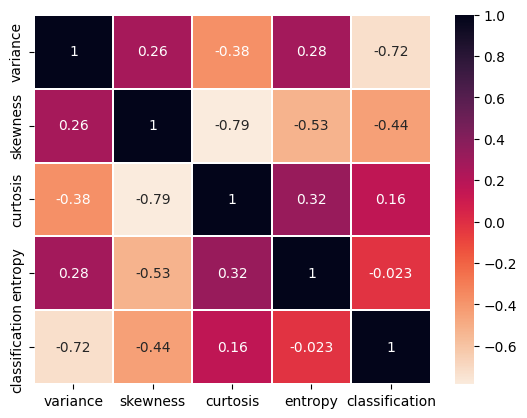

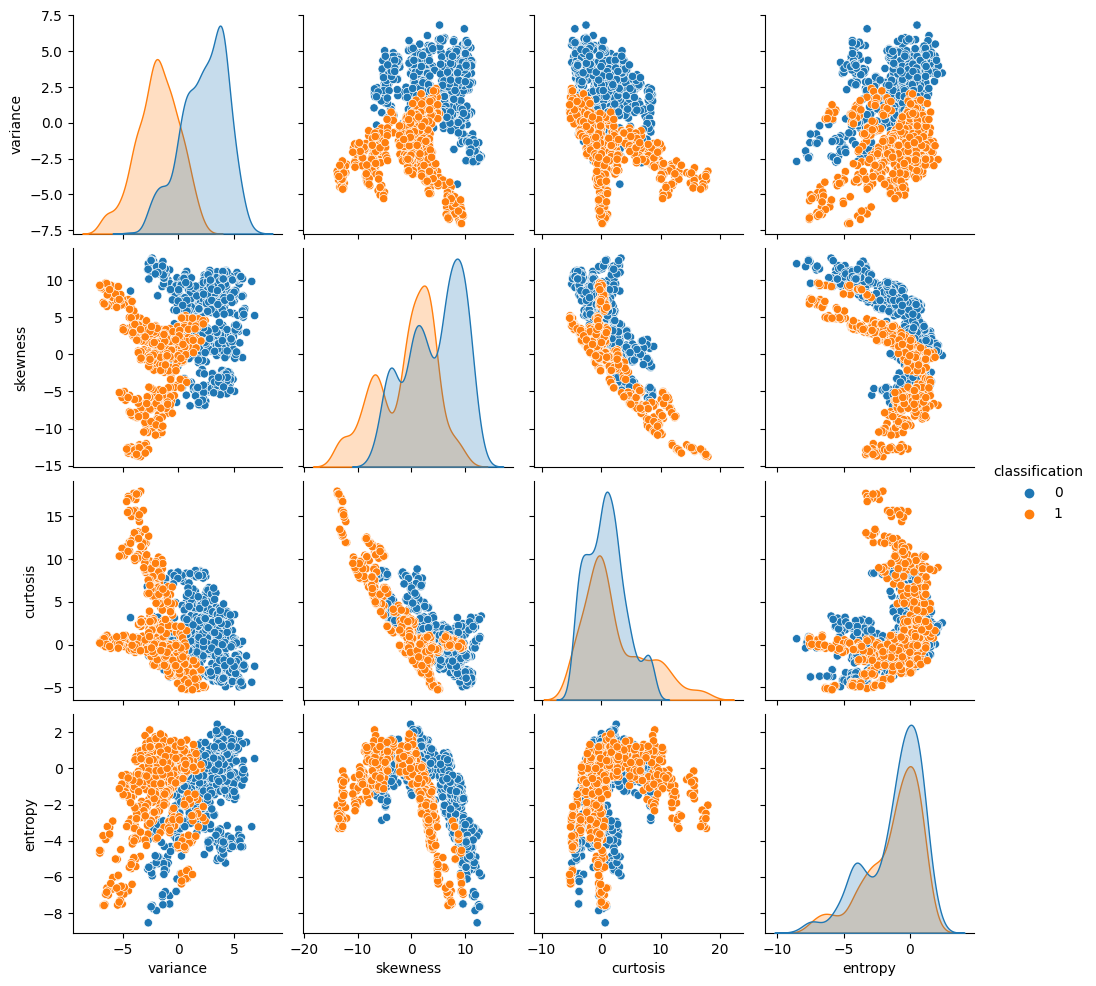

classification
0    762
1    610
Name: count, dtype: int64


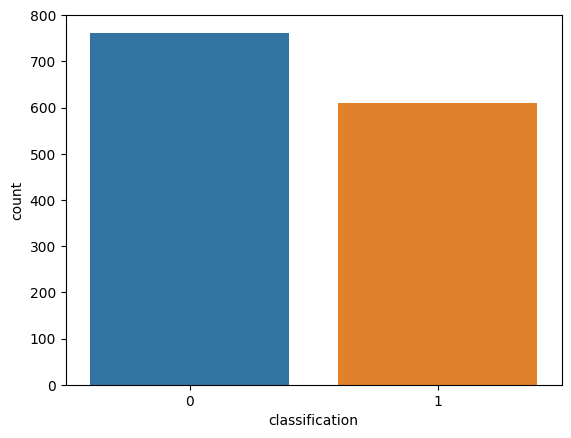

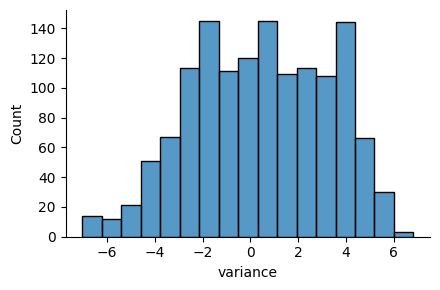

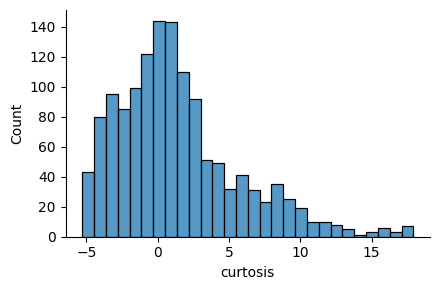

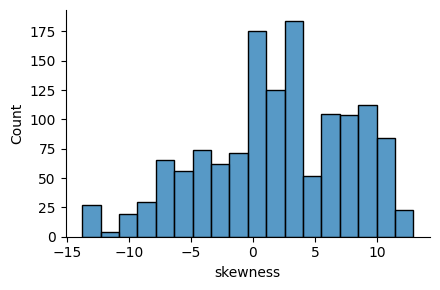

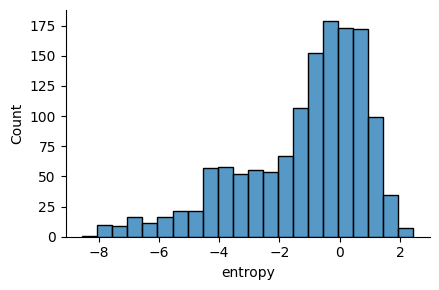

SVM Score ->  1.0
Score Modelo SVC ->  1.0
Score dos Testes (Modelo SVC) ->  1.0


In [4]:
# Treinando o Modelo svm.LinearSVC
svc = SVC()
svc_model = svc.fit(x_train, y_train)
svc_preds = svc.predict(x_test)


# Score dos Modelos
def show_scores():
    # Avaliando a Eficacia
    svm_accuracy = accuracy_score(y_test, svc_preds)
    print("SVM Score -> ", svm_accuracy)
    # Coeficiente de determinação
    print("Score Modelo SVC -> ", svc_model.score(x_train, y_train))
    print("Score dos Testes (Modelo SVC) -> ", svc_model.score(x_test, y_test))


# Simulando User Entries
def user_entries(variance, curtosis, skewness, entropy):
    user_entry = [[variance, curtosis, skewness, entropy]]
    result = svc_model.predict(user_entry)
    return result[0]


# Salvando Modelo
def save_model():
    joblib.dump(svc_model, "./model/banking.pkl")


# Importando Modelo
def test_save_model():
    loaded_model = joblib.load("./model/banking.pkl")
    print(loaded_model.predict(x_test))


show_graphs()
show_scores()
# save_model()
# test_save_model()